# SD212: Graph mining

# Lab 1: Sampling

The objective of this lab is to explore differents ways to sample nodes in graphs. You're supposed to have done the lab on sparse matrices before.

## Import

In [1]:
from IPython.display import SVG

In [2]:
import numpy as np
from scipy import sparse

In [3]:
from sknetwork.data import load_netset
from sknetwork.visualization import svg_graph

In [4]:
from sknetwork.linalg import normalize

## Graphs

We will sample nodes from [Openflights](https://openflights.org), the graph of daily flights between airports.

In [5]:
graph = load_netset('openflights')

In [6]:
# weighted
adjacency_weighted = graph.adjacency
names = graph.names
position = graph.position

In [7]:
# display graph (without edges)
image = svg_graph(adjacency_weighted, position, height=400, width=800, 
                  display_node_weight=True, display_edges=False)

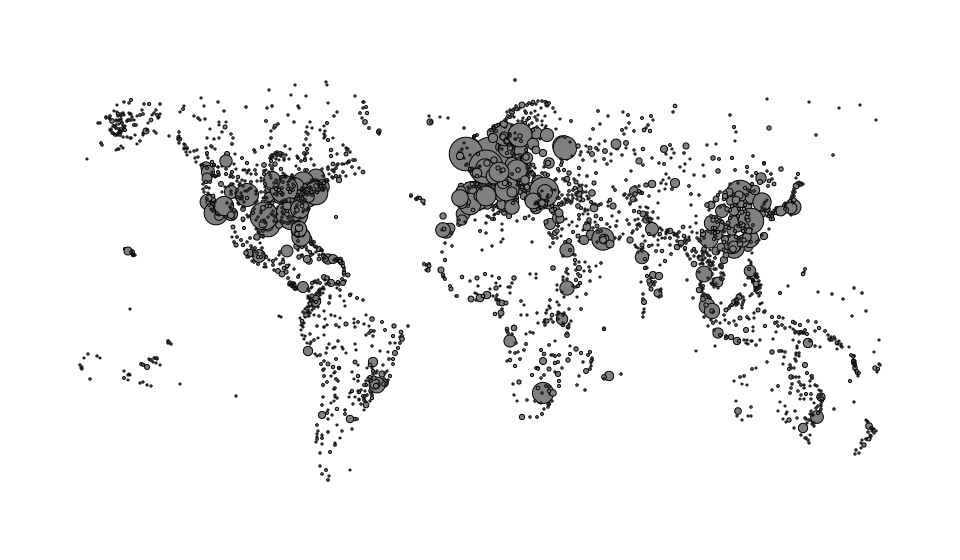

In [8]:
SVG(image)

In [9]:
# unweighted
adjacency = (adjacency_weighted > 0).astype(int)

## To do

* How many nodes are there in this graph?
* How many edges?
* What is the degree of Paris-Orly airport?

In [13]:
adjacency.shape[0]

3097

In [14]:
adjacency.nnz/2

18193.0

In [15]:
(adjacency[np.argwhere(graph.names == "Paris-Orly Airport")[0],:]).nnz

119

In [203]:
# empirical average of degree
adjacency.nnz/adjacency.shape[0]

11.748789150791088

## To do

Sample 10 nodes at random and give their names, using the following methods:
* uniform node sampling
* uniform edge sampling
* uniform neighbor sampling

In [16]:
def sample_nodes(adjacency, n_samples = 10):
    '''Sample nodes uniformly at random.
    
    Parameters
    ----------
    adjacency : sparse.csr_matrix
        Adjacency matrix.
    n_samples : int
        Number of samples.
        
    Returns
    -------
    nodes : np.ndarray
        Sampled nodes.
    '''
    # to be modified
    # no loop allowed
    
    return np.random.choice(adjacency.shape[0], size=n_samples)

In [99]:
def sample_from_edges(adjacency, n_samples = 10):
    '''Sample nodes from edges, selected uniformly at random.
    
    Parameters
    ----------
    adjacency : sparse.csr_matrix
        Adjacency matrix.
    n_samples : int
        Number of samples.
        
    Returns
    -------
    nodes : np.ndarray
        Sampled nodes.
    '''
    # to be modified
    # no loop allowed
    
#     dj = np.array((adjacency!=0).sum(axis = 1).transpose())[0]
#     return np.random.choice(adjacency.shape[0],p=1/adjacency.nnz*dj, size=n_samples)
    return np.random.choice(adjacency.indices, size=n_samples)

In [184]:
def sample_from_neighbors(adjacency, n_samples = 10):
    '''Sample nodes from neighbors, selected uniformly at random.
    
    Parameters
    ----------
    adjacency : sparse.csr_matrix
        Adjacency matrix.
    n_samples : int
        Number of samples.
        
    Returns
    -------
    nodes : np.ndarray
        Sampled nodes.
    '''
    # to be modified
    # one loop allowed
    node = sample_nodes(adjacency, n_samples)
    voisin = [np.random.choice(np.argwhere(adjacency[n,:]!=0)[:,1], size=1)[0] for n in node]
    return np.array(voisin)

In [137]:
# node sampling
names[sample_nodes(adjacency, 10)]

array(['Faleolo International Airport', 'San Tomé Airport',
       'MBS International Airport', 'Quelimane Airport',
       'Khanty Mansiysk Airport', 'Kaltag Airport',
       'Volgograd International Airport',
       'Sir Grantley Adams International Airport',
       'Alferez Fap David Figueroa Fernandini Airport',
       'Capitan Oriel Lea Plaza Airport'], dtype='<U65')

In [102]:
# edge sampling
names[sample_from_edges(adjacency, 10)]

array(['Yemelyanovo Airport', 'Changzhi Airport',
       'Indira Gandhi International Airport',
       'Marechal Cunha Machado International Airport',
       'Wuhan Tianhe International Airport', 'Singapore Changi Airport',
       'Leonardo da Vinci–Fiumicino Airport',
       'Las Américas International Airport', 'Congonhas Airport',
       'Manchester Airport'], dtype='<U65')

In [187]:
# neighbor sampling
names[sample_from_neighbors(adjacency, 10)]

array(['Puerto Jimenez Airport', 'Bodø Airport',
       'Detroit Metropolitan Wayne County Airport',
       'Ndjili International Airport', 'Paris Beauvais Tillé Airport',
       'Benazir Bhutto International Airport', 'Agen-La Garenne Airport',
       'Figari Sud-Corse Airport',
       'Detroit Metropolitan Wayne County Airport',
       'El Dorado International Airport'], dtype='<U65')

## To do

Compute the average degree of a node sampled with each of the above sampling methods.

**Note:** You must give the exact value (i.e., don't sample nodes!)

In [217]:
# node sampling
E_nd_samp = adjacency.nnz/adjacency.shape[0]

# edge sampling
E_edge_samp = (np.array(adjacency.sum(axis = 1).transpose())[0]**2).sum()/adjacency.shape[0]/E_nd_samp

# Neighbor sampling
dj = sparse.csr_matrix(np.array(adjacency.sum(axis=0))[0])
inv_di  = dj.copy()
inv_di.data=1/inv_di.data
E_neig_samp = 1/adjacency.shape[0]*np.dot(np.dot(inv_di,adjacency),dj.transpose())

print("Node sampling: ")
print("\tAverage degree: ",E_nd_samp)
print("Edge sampling: ")
print("\tAverage degree: ",E_edge_samp)
print("Neighbor sampling: ")
print("\tAverage degree: ",E_neig_samp.data[0])

Node sampling: 
	Average degree:  11.748789150791088
Edge sampling: 
	Average degree:  64.27395151981531
Neighbor sampling: 
	Average degree:  57.26018528653669


In [104]:
# test empirique node sampling
np.array(adjacency[sample_nodes(adjacency, 1000000),:].sum(axis=1).ravel())[0].sum()/1000000

11.748074

In [106]:
# test empirique edge sampling
np.array(adjacency[sample_from_edges(adjacency, 1000000),:].sum(axis=1).ravel())[0].sum()/1000000

64.283414

In [195]:
# test empirique edge sampling
np.array(adjacency[sample_from_neighbors(adjacency, 1000000),:].sum(axis=1).ravel())[0].sum()/1000000

57.280404

## Weighted graphs

We now take the weights into account (here the daily number of flights between airports).

## To do

* How many daily flights are there?
* What are the top-3 airports in number of flights?

In [20]:
Nb_flights = graph.adjacency.data.sum()/2
top_3      = np.argsort(np.array(graph.adjacency.sum(axis=1).ravel())[0])[::-1][:3]
print("Number of daily flights: ")
print("\t",Nb_flights)
print("Top 3: ")
print("\t",graph.names[top_3])

Number of daily flights: 
	 32642.0
Top 3: 
	 ['Amsterdam Airport Schiphol' 'Charles de Gaulle International Airport'
 'Dublin Airport']


## To do

Sample 10 nodes at random and give their names, using the following methods:
* weighted edge sampling
* weighted neighbor sampling

In [218]:
def sample_from_edges_weighted(adjacency, n_samples = 10):
    '''Sample nodes from edges, selected in proportion to weights.
    
    Parameters
    ----------
    adjacency : sparse.csr_matrix
        Weigthed adjacency matrix.
    n_samples : int
        Number of samples.
        
    Returns
    -------
    nodes : np.ndarray
        Sampled nodes.
    '''
    # to be modified
    # no loop allowed
    dj = np.array(adjacency.sum(axis = 1).transpose())[0]
    return np.random.choice(adjacency.shape[0],p=1/adjacency.data.sum()*dj, size=n_samples)

In [241]:
def sample_from_neighbors_weighted(adjacency, n_samples = 10):
    '''Sample nodes from neighbors, selected uniformly at random.
    
    Parameters
    ----------
    adjacency : sparse.csr_matrix
        Weigthed adjacency matrix.
    n_samples : int
        Number of samples.
        
    Returns
    -------
    nodes : np.ndarray
        Sampled nodes.
    '''
    # to be modified
    # one loop allowed
    node = sample_nodes(adjacency, n_samples)
    voisin=[]
    for n in node:
        neigh = adjacency[n,:]
        voisin.append(np.random.choice(np.argwhere(neigh!=0)[:,1],p=1/neigh.data.sum()*neigh.data, size=1)[0])
    return np.array(voisin)

## To do

Compute the average weight (i.e., average number of daily flights) of a node sampled from the above sampling methods.

**Note:** Again, you must give the exact value.

In [219]:
# node sampling
E_nd_samp   = (adjacency_weighted.sum(axis=1)).sum()/adjacency_weighted.shape[0]

# edge sampling
E_edge_samp = (np.array(adjacency_weighted.sum(axis = 1).transpose())[0]**2).sum()/adjacency_weighted.shape[0]/E_nd_samp

# Neighbor sampling
dj = sparse.csr_matrix(np.array(adjacency_weighted.sum(axis=0))[0])
inv_di  = dj.copy()
inv_di.data=1/inv_di.data
E_neig_samp = 1/adjacency_weighted.shape[0]*np.dot(np.dot(inv_di,adjacency_weighted),dj.transpose())

print("Node sampling: ")
print("\tAverage degree: ",E_nd_samp)
print("Edge sampling: ")
print("\tAverage degree: ",E_edge_samp)
print("Neighbor sampling: ")
print("\tAverage degree: ",E_neig_samp.data[0])

Node sampling: 
	Average degree:  21.079754601226995
Edge sampling: 
	Average degree:  118.47420501194779
Neighbor sampling: 
	Average degree:  101.09503054196833


In [231]:
# test empirique edge sampling
np.array(adjacency_weighted[sample_from_edges_weighted(adjacency_weighted, 1000000),:].sum(axis=1).ravel())[0].sum()/1000000

118.483214

In [242]:
# test empirique edge sampling
np.array(adjacency_weighted[sample_from_neighbors_weighted(adjacency_weighted, 1000000),:].sum(axis=1).ravel())[0].sum()/1000000

101.184873